<a href="https://colab.research.google.com/github/Sadhana1842/ML-End-Sem-project/blob/main/ML_project_end_sem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv', encoding='Windows-1252')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1960,spam,Guess what! Somebody you know secretly fancies...,NaN,NaN,NaN
537,ham,Or maybe my fat fingers just press all these b...,NaN,NaN,NaN
4130,ham,\Its Ur luck to Love someone. Its Ur fortune t...,its a miracle to Love a person who can't Love...,NaN,NaN
1681,ham,Y lei?,NaN,NaN,NaN
310,ham,Today is ACCEPT DAY..U Accept me as? Brother S...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

DATA CLEANING

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last thre columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
530,spam,PRIVATE! Your 2003 Account Statement for 07815...
3456,ham,Friendship poem: Dear O Dear U R Not Near But ...
3739,ham,No da. . Vijay going to talk in jaya tv
5463,ham,U GOIN OUT 2NITE?
1072,spam,Dear U've been invited to XCHAT. This is our f...


In [9]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.sample(5)

,target,text
1305,ham,Designation is software developer and may be s...
2280,ham,R Ì_ comin back for dinner?
5558,ham,"Sorry, I'll call later"
15,spam,"XXXMobileMovieClub: To use your credit, click ..."
3487,ham,Still i have not checked it da. . .


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#missing value check
df.isnull().sum()

,0
target,0
text,0


In [15]:
df.duplicated().sum()

403

In [16]:
#remove duplicate
df=df.drop_duplicates(keep="first")

In [17]:
df.duplicated().sum()

0

EDA


In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

,count
target,
0,4516
1,653


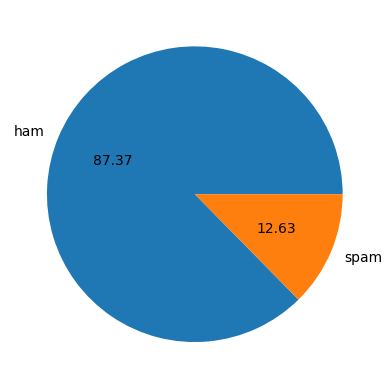

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
#data is imabalanced

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
df['num_char']=df['text'].apply(len)

In [25]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#ham
df[df['target']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#spam
df[df['target']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
import seaborn as sns


<Axes: xlabel='num_char', ylabel='Count'>

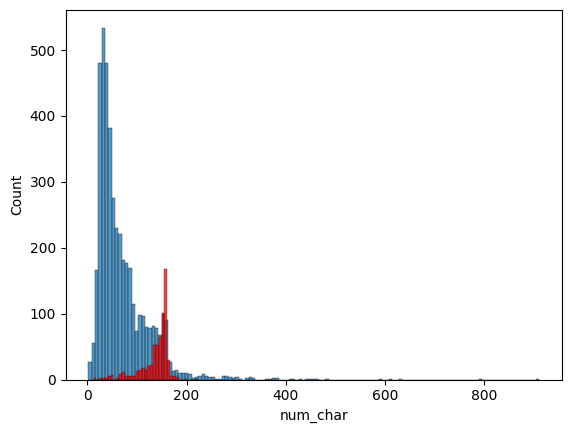

In [34]:
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')


In [35]:
#Spam messages have more words,sentences on an average

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

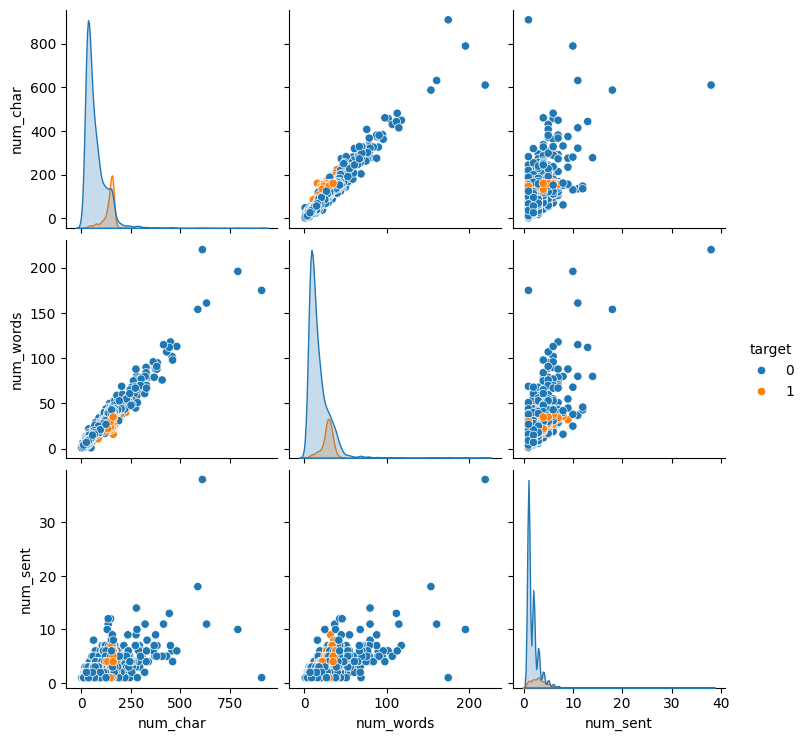

In [36]:
sns.pairplot(df,hue='target')

<Axes: >

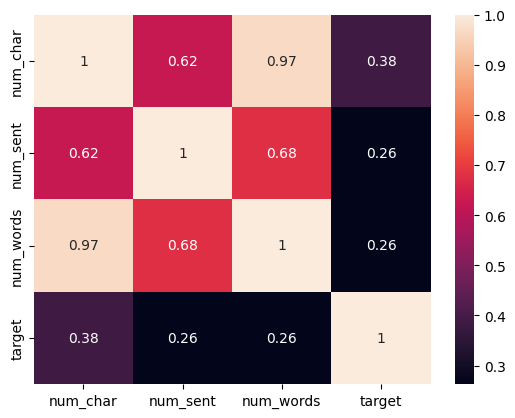

In [37]:
selected_columns=df[['num_char','num_sent','num_words','target']]
sns.heatmap(selected_columns.corr(),annot=True)

In [38]:
#So the correlation between the target and num_char is higher than any other parameter.Therefore I will use that parameter for the model

Data Preprocessing

1.Lower case

2.Tokenize

3.Remove special chars

4.Remove stop words and punctuations

5.Stemming(remove similar words and put them as one)

In [39]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [41]:
ps=PorterStemmer()

In [42]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if(i.isalnum()):
      y.append(i)

  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [43]:
df['trans_text']=df['text'].apply(transform_text)

In [44]:
df.head()

,target,text,num_char,num_words,num_sent,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [46]:
spam_wc=wc.generate(df[df['target']==1]['trans_text'].str.cat(sep=" "))

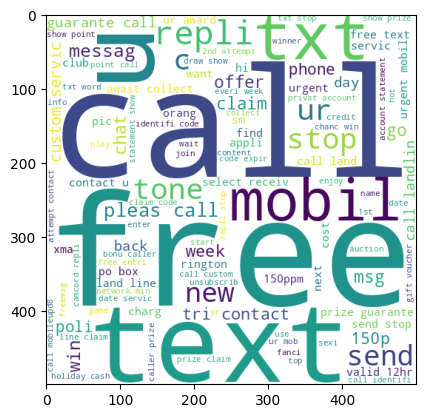

In [47]:
plt.imshow(spam_wc)

In [48]:
ham_wc=wc.generate(df[df['target']==0]['trans_text'].str.cat(sep=" "))

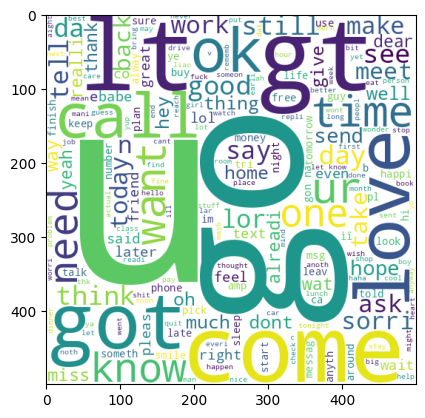

In [49]:
plt.imshow(ham_wc)

In [50]:
spam_corpus=[]
for msg in df[df['target']==1]['trans_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [51]:
len(spam_corpus)

9939

In [52]:
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [53]:
df_spam=pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['Word', 'Count'])
df_spam

,Word,Count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


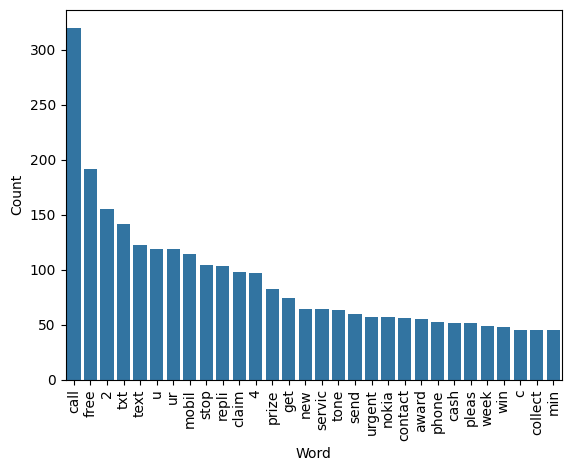

In [54]:
sns.barplot(x='Word',y='Count',data=df_spam)
plt.xticks(rotation='vertical')
plt.show()

In [55]:
ham_corpus=[]
for msg in df[df['target']==0]['trans_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [56]:
df_ham=pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['Word', 'Count'])
df_ham

,Word,Count
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


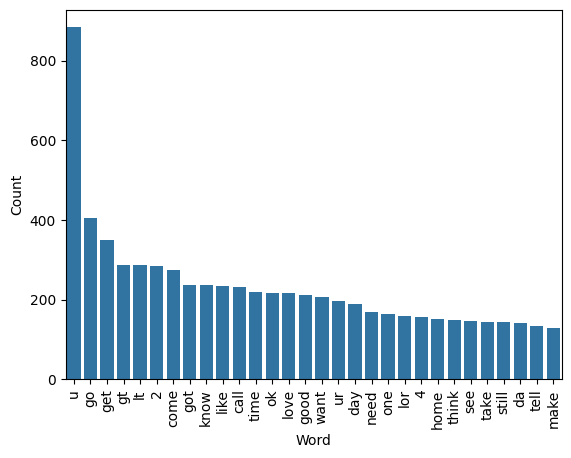

In [57]:
sns.barplot(x='Word',y='Count',data=df_ham)
plt.xticks(rotation='vertical')
plt.show()

MODEL BUILDING

In [58]:
#Vectorise data using bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [59]:
X=cv.fit_transform(df['trans_text']).toarray()

In [60]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [61]:
X.shape

(5169, 6708)

In [62]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [67]:
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print(precision_score(y_test,y_pred))

0.8800773694390716
[[792  20]
 [104 118]]
0.5315315315315315


In [68]:
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_pred1,y_test))
print(precision_score(y_test,y_pred1))

0.9642166344294004
[[871  12]
 [ 25 126]]
0.8344370860927153


In [69]:
bnb.fit(X_train,y_train)
y_pred2=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_pred2,y_test))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[893  28]
 [  3 110]]
0.9734513274336283


In [70]:
#vectorization using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [71]:
X=tfidf.fit_transform(df['trans_text']).toarray()

In [72]:
X.shape


(5169, 3000)

In [73]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [75]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [76]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [77]:
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print(precision_score(y_test,y_pred))

0.8733075435203095
[[790  25]
 [106 113]]
0.5159817351598174


In [78]:
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_pred1,y_test))
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[896  30]
 [  0 108]]
1.0


In [79]:
bnb.fit(X_train,y_train)
y_pred2=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_pred2,y_test))
print(precision_score(y_test,y_pred2))

0.9835589941972921
[[895  16]
 [  1 122]]
0.991869918699187


Choosing MultinomialNB with tfidf due to its perfect precision score

In [80]:
def classify_message(message):
  processed_msg=transform_text(message)
  v_msg=tfidf.transform([processed_msg])
  prediction=mnb.predict(v_msg)
  if prediction[0]==1:
    print("The message is classified as spam")
  else:
    print("The message is classfied as Not spam")

In [81]:
user_input=input("Enter message to check: ")
classify_message(user_input)

Enter message to check: Congratulations! You’ve won a $1,000 gift card! Click here to claim your prize
The message is classified as spam


NLP MODEL

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['trans_text'], df['target'], test_size=0.2, random_state=42
)

# Display the results
print("Train Texts:", train_texts)
print("Test Texts:", test_texts)
print("Train Labels:", train_labels)
print("Test Labels:", test_labels)


Train Texts: 2228                                         exact intent
5529                                                  one
2149                           waaaat lololo ok next time
5058    free video camera phone half price line rental...
5051    tick tick tick could die loneli know pout stom...
                              ...                        
4740            mani happi return day wish happi birthday
474     nice line said broken plz cum 1 time infront w...
3266                               ok come n pick u engin
4016    eek lot time especi sinc american pie like 8 m...
879     u secret admir look 2 make contact r reveal th...
Name: trans_text, Length: 4135, dtype: object
Test Texts: 1617                                 u download fring app
2064    pass di ur contact n see wat u get red luv wid...
1272                                                   ok
3020                                  film ill call later
3642    sorri left phone upstair ok might hectic would...
 

In [83]:
# Import necessary libraries
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


# Tokenize the texts
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True, max_length=128)

# Create a custom Dataset class
class SpamDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


train_dataset = SpamDataset(train_encodings, train_labels.tolist())
test_dataset = SpamDataset(test_encodings, test_labels.tolist())

# Define a compute_metrics function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Fine-tune the model
trainer.train()

# Evaluate the model
trainer.evaluate()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.145400,0.103168,0.972921,0.898551,0.946565,0.855172
2,0.079900,0.080619,0.984526,0.944056,0.957447,0.931034
3,0.042400,0.072795,0.985493,0.948454,0.945205,0.951724


{'eval_loss': 0.07279518246650696,
 'eval_accuracy': 0.9854932301740812,
 'eval_f1': 0.9484536082474226,
 'eval_precision': 0.9452054794520548,
 'eval_recall': 0.9517241379310345,
 'eval_runtime': 4.3189,
 'eval_samples_per_second': 239.41,
 'eval_steps_per_second': 30.1,
 'epoch': 3.0}

In [89]:
input_text = input()
inputs = tokenizer(input_text, return_tensors="pt", truncation=True, padding=True, max_length=128)
inputs = {key: val.to(device) for key, val in inputs.items()}


model.eval()
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    prediction = torch.argmax(logits, dim=-1).item()

if(prediction==1):
  print("The message is classified as spam")
else:
  print("The message is classfied as Not spam")

Congratulations! You’ve won a $1,000 gift card! Click here to claim your prize
The message is classified as spam
